<a href="https://colab.research.google.com/github/sakshisubedi/CSE_256_NLP/blob/main/knn/imdb_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/CSE_256_Project

/content/drive/MyDrive/CSE_256_Project


In [ ]:
import pandas as pd
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("IMDB-Dataset.csv")

In [ ]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
df_train.head()

,review,sentiment
39087,That's what I kept asking myself during the ma...,0
30893,I did not watch the entire movie. I could not ...,0
45278,A touching love story reminiscent of In the M...,1
16398,This latter-day Fulci schlocker is a totally a...,0
13653,"First of all, I firmly believe that Norwegian ...",0


In [ ]:
# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_transform = vectorizer.fit_transform(df_train['review'])
X_test_transform = vectorizer.transform(df_test['review'])

In [ ]:
import time

# Start the timer
start_time = time.time()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [ ]:
execution_time = time.time() - start_time
execution_time

0.015179157257080078

In [ ]:
classifier.fit(X_train_transform, df_train['sentiment'])

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test_transform)

In [ ]:
accuracy = accuracy_score(df_test['sentiment'], y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.769


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(df_test['sentiment'], y_pred)
confusion_mat

array([[3620, 1341],
       [ 969, 4070]])

Text(0.5, 1.0, 'Confusion Matrix')

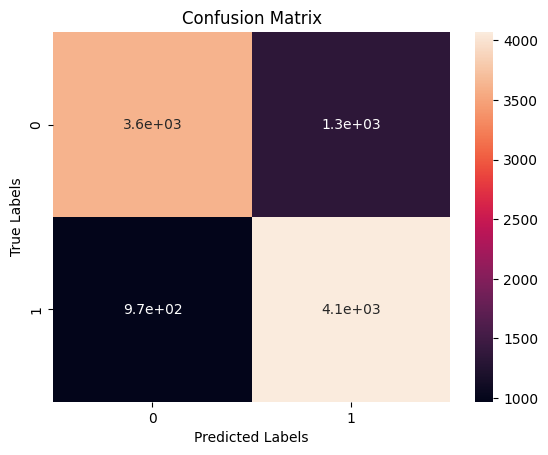

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_mat, annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')

In [ ]:
# Calculate class-wise accuracy
import numpy as np
class_accuracy = np.diagonal(confusion_mat) / np.sum(confusion_mat, axis=1)
print("class-wise accuracy")
class_accuracy

class-wise accuracy


array([0.72969159, 0.80769994])

In [ ]:
# Identify misclassified instances
num_classes = len(confusion_mat)

misclassified_instances = []

for i in range(num_classes):
    for j in range(num_classes):
        if i != j and confusion_mat[i, j] > 0:
            misclassified_instances.append((i, j, confusion_mat[i, j]))
misclassified_instances

[(0, 1, 1341), (1, 0, 969)]

In [ ]:
# printing misclassified data
wrong_predictions = 0
for idx, _ in enumerate(y_pred):
  if df_test.iloc[idx]['sentiment'] != y_pred[idx]:
    print(df_test.iloc[idx]['review'] + "\n\n")
    wrong_predictions += 1

Streaming output truncated to the last 5000 lines.
Being an independent filmmaker and a huge fan of Edward D. Wood Jr. I purchased this documentary believing that this would finally set the record straight on how gifted and brilliant Ed Wood actually was. <br /><br />What I got was a disappointing self-centered, conflictive, contradictory compilation of bitter self-aggrandizing has-beens. <br /><br />Where people DO remember Ed Wood Jr., do people actually remember the second cousin of the guy with the duct tape who knew someone who was in Plan Nine From Outer Space? <br /><br />It appears as though, the very minute there is a renewed interest in Ed Wood, these people come out of the "Wood"work! Only to take mean spirited swipes at someone who actually gave them a chance when no-one else would! After 50 years I would suggest that many of these people should let go of the fact that they didn't get the $75 they were promised!<br /><br />Ed Wood was a brilliant creative filmmaker who knew

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# printing wrong predictions
wrong_predictions

2310

In [ ]:
# common misclassification
common_misclassifications = sorted(misclassified_instances, key=lambda x: x[2], reverse=True)
common_misclassifications

[(0, 1, 1341), (1, 0, 969)]

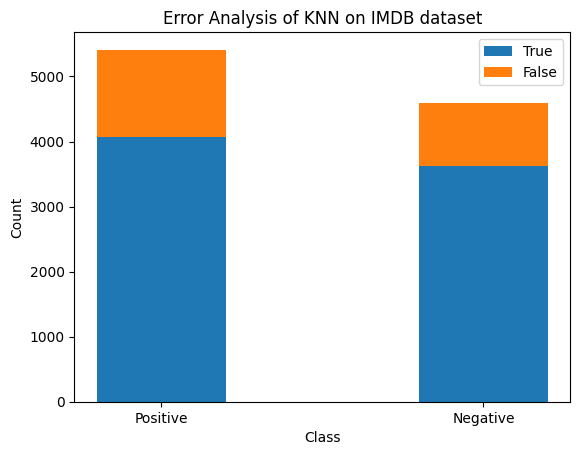

In [ ]:
true_positives = confusion_mat[1, 1]
true_negatives = confusion_mat[0, 0]
false_positives = confusion_mat[0, 1]
false_negatives = confusion_mat[1, 0]

# Set the labels for x-axis
labels = ['Positive', 'Negative']

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots()
rects1 = ax.bar(x, [true_positives, true_negatives], width, label='True')
rects2 = ax.bar(x, [false_positives, false_negatives], width, label='False', bottom=[true_positives, true_negatives])

# Set plot title, legend, and axis labels
ax.set_title('Error Analysis of KNN on IMDB dataset')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()